# Emma's Honours thesis

## Python prelude

First, we have to import some pyhon packages, *important*, **very important**  
Remember: cells are run with Shift+Enter, or with the **Run** button

In [1]:
import os # comment: operating system: file management, change directories, make folders...
import numpy as np # numerics package: maths functions, signal processing functions, statistics...
import matplotlib.pyplot as plt # plotting, graphs...
import wfdb

In [2]:
print("working directory: ", os.getcwd())

working directory:  C:\Users\z3528600


Let's generate and plot some random numbers using Python's random number generator...

In [3]:
x=np.random.randn(1000) # x is an array of 1000 Gaussian (pseudo-)random numbers
print(type(x), x.shape)

<class 'numpy.ndarray'> (1000,)


Now, x contains 1000 normally (Gaussian) distributed random numbers, i.e. mean=0, variance=1

Let's randomly change some values of the array, just to see we can...  
If you don't want to do that, change the next cell to markdown, and it will not be executed (exercise).

x[500] = 10 # set the value at position 500 to 10
x[100:150] = 0 # set all values between pos. 100..150 to zero

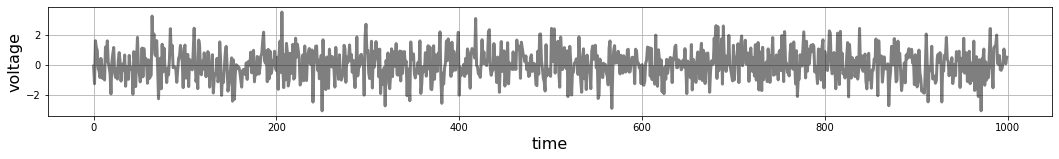

In [4]:
plt.figure(figsize=(18,2))
plt.plot(x, color='k', linewidth=3, alpha=0.5)
plt.xlabel("time", fontsize=16)
plt.ylabel("voltage", fontsize=16)
plt.grid(True)
#plt.savefig("Figure1.jpg", dpi=300)

In [5]:
print(np.mean(x)) # should be close to 0
print(np.var(x)) # should be close to 1

0.02151623851728107
1.018256931400209


## Data import

To import data, we have to define the path to our data directory, in my case:

In [6]:
data_dir = "C:\\Users\\z3528600\\Downloads\\data\\preterm-infant-cardio-respiratory-signals-database-1.0.0"

Python's os (operating system) library has a way of switching between folders/directories: os.chdir() ("change directory")  
Just as if you were clicking through your windows explorer...

In [7]:
os.chdir(data_dir)

Let's confirm we are in the right directory, using another os function, by printing the result of os.getcwd() (=current working directory).

In [8]:
current_dir = os.getcwd()
print("We are currently working in: ", current_dir)

We are currently working in:  C:\Users\z3528600\Downloads\data\preterm-infant-cardio-respiratory-signals-database-1.0.0


Now, we make a list of all files in this directory, so we can later iterate over these files.

In [9]:
L = os.listdir()
print(type(L))

<class 'list'>


L is a variable of type 'list', we can look at its content with a for-loop, for instance:

In [10]:
for l in L:
    #print(l)
    pass

Instead of iterating over all files, let's just take a look on one of them manually:

In [11]:
file_index = 2
file_ecg = f"infant{file_index:d}_ecg"
file_resp = f"infant{file_index:d}_resp"
print("Loading ECG file: ", file_ecg)
print("Loading RESP file: ", file_resp)

Loading ECG file:  infant2_ecg
Loading RESP file:  infant2_resp


The ECG and RESP files are loaded with help of the wfdb library:

In [12]:
record_ecg = wfdb.rdrecord(file_ecg)
record_resp = wfdb.rdrecord(file_resp)

The files contain lots of metadata, and of course, the physiological data as arrays.  
This data can be retrieved in a so called 'dictionary', one of the most used variable types in Python.

In [13]:
d_ecg = record_ecg.__dict__
d_resp = record_resp.__dict__
print(d_ecg)
print(d_resp)

{'record_name': 'infant2_ecg', 'n_sig': 1, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 78916000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['II'], 'p_signal': array([[-0.00982986],
       [-0.01474478],
       [-0.01474478],
       ...,
       [ 0.10321349],
       [ 0.10894757],
       [ 0.10976672]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['infant2_ecg.dat'], 'fmt': ['16'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [None], 'adc_gain': [1220.7707], 'baseline': [15160], 'units': ['mV'], 'adc_res': [0], 'adc_zero': [0], 'init_value': [15148], 'checksum': [-14825], 'block_size': [0]}
{'record_name': 'infant2_resp', 'n_sig': 1, 'fs': 50, 'counter_freq': None, 'base_counter': None, 'sig_len': 7891433, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['RESP'], 'p_signal': array([[21.92315057],
       [22.01228904],
       [22.14775144],
       ...,
       [22.99842723],
       [23.04

You see that there are string variables enclosed by '' and followed by a ':', they are called keys and act as descriptors of what kind of variable/information follows.  
Each key can be followed by any kind of variable, a string (i.e. text), a number, an array of numbers...

In [14]:
# simple dict example here...

In [15]:
print("ECG record: ", d_ecg['record_name'])
print("number of signals: ", d_ecg['n_sig'])
print("sampling frequency: ", d_ecg['fs'], "Hz")
print("Number of samples: ", d_ecg['sig_len'])
print("Signal name: ", d_ecg['sig_name'])

ECG record:  infant2_ecg
number of signals:  1
sampling frequency:  500 Hz
Number of samples:  78916000
Signal name:  ['II']


In [16]:
print("RESP record: ", d_resp['record_name'])
print("number of signals: ", d_resp['n_sig'])
print("sampling frequency: ", d_resp['fs'], "Hz")
print("Number of samples: ", d_resp['sig_len'])
print("Signal name: ", d_resp['sig_name'])

RESP record:  infant2_resp
number of signals:  1
sampling frequency:  50 Hz
Number of samples:  7891433
Signal name:  ['RESP']


In [17]:
x_ecg = d_ecg['p_signal'].ravel()
print(x_ecg.shape, x_ecg.dtype)

(78916000,) float64


In [18]:
x_resp = d_resp['p_signal'].ravel()
print(x_resp.shape, x_resp.dtype)

(7891433,) float64


In [19]:
fs_ecg = d_ecg['fs'] # ECG sampling rate in Hz
dt_ecg = 1/fs_ecg # ECG sampling interval in sec.
fs_resp = d_resp['fs'] # RESP sampling rate in Hz
dt_resp = 1/fs_resp # RESP sampling interval in sec.

In [20]:
print("ECG sampling frequency: ", fs_ecg, " Hz")
print("ECG sampling interval dt = ", dt_ecg, " sec.")
print("RESP sampling frequency: ", fs_resp, " Hz")
print("RESP sampling interval dt = ", dt_resp, " sec.")

ECG sampling frequency:  500  Hz
ECG sampling interval dt =  0.002  sec.
RESP sampling frequency:  50  Hz
RESP sampling interval dt =  0.02  sec.


In [21]:
time_ecg = np.arange(x_ecg.shape[0])*dt_ecg # ECG time axis
time_resp = np.arange(x_resp.shape[0])*dt_resp # RESP time axis

print(time.max()/3600)

print(type(time), time.shape)
y=82122000/500
print(y)

Plotting the result in an external window:

In [22]:
# this tells the notebook to open figures outside of the notebook
%matplotlib qt

# set display time limits manually, recordings are many hours, millions of data points...
t0_sec, t1_sec = 9770, 9890 # seconds

# convert seconds to samples, respect different sampling rates for ECG and RESP signals
t0_sample_ecg = round(t0_sec * fs_ecg)
t1_sample_ecg = round(t1_sec * fs_ecg)
t0_sample_resp = round(t0_sec * fs_resp)
t1_sample_resp = round(t1_sec * fs_resp)

fig1, ax = plt.subplots(2, 1, figsize=(16,4), sharex=True)
ax[0].plot(time_ecg[t0_sample_ecg:t1_sample_ecg], x_ecg[t0_sample_ecg:t1_sample_ecg], '-k', lw=0.5)
ax[1].plot(time_resp[t0_sample_resp:t1_sample_resp], x_resp[t0_sample_resp:t1_sample_resp], '-k', lw=0.5)
ax[0].set_xlabel("time [sec]")
ax[1].set_xlabel("time [sec]")
ax[0].set_title("ECG")
ax[1].set_title("RESP")
plt.tight_layout()
plt.show()

input("press ENTER to continue...")

## Start signal processing

cut segment

In [23]:
x_ecg = x_ecg[t0_sample_ecg:t1_sample_ecg]
x_resp = x_resp[t0_sample_resp:t1_sample_resp]
x_ecg = x_ecg - x_ecg.mean()
x_resp = x_resp - x_resp.mean()
time_ecg = time_ecg[t0_sample_ecg:t1_sample_ecg]
time_resp = time_resp[t0_sample_resp:t1_sample_resp]

In [24]:
from scipy.signal import welch, butter, filtfilt

In [25]:
def bp_filter(x, fs, f_lo, f_hi):
    """
    implement digital band-pass filter
    6-th order Butterworth filter, zero-phase implementation
    """
    f_Ny = fs/2
    b_lo = f_lo / f_Ny
    b_hi = f_hi / f_Ny
    # filter parameters
    p_lp = {'N':6, 'Wn': b_hi, 'btype': 'lowpass', 'analog': False, 'output': 'ba'}
    p_hp = {'N':6, 'Wn': b_lo, 'btype': 'highpass', 'analog': False, 'output': 'ba'}
    bp_b1, bp_a1 = butter(**p_lp)
    bp_b2, bp_a2 = butter(**p_hp)
    x_filt = filtfilt(bp_b1, bp_a1, x, axis=0)
    x_filt = filtfilt(bp_b2, bp_a2, x_filt, axis=0)
    return x_filt

apply band-pass filter

In [26]:
# define cut-off frequencies for ECG signals
freq_lo_ecg = 20
freq_hi_ecg = 0.25*fs_ecg
x_ecg_filt  = bp_filter(x_ecg, fs_ecg, freq_lo_ecg, freq_hi_ecg)

# define cut-off frequencies for RESP signals
freq_lo_resp = 0.5
freq_hi_resp = 5
x_resp_filt = bp_filter(x_resp, fs_resp, freq_lo_resp, freq_hi_resp)

detect local maxima

In [27]:
def locmax(x):
    p = 1 + np.where(np.diff(np.sign(np.diff(x))) == -2)[0]
    return p

In [28]:
def p_hat(x, n_bins=50, method='histogram'):
    """
    Histogram / kernel estimate of p(r)
    method = 'histogram', 'kernel'
    """
    x_max = x.max()

    if method == 'histogram':
        x_bins = np.linspace(0, x_max, num=n_bins, endpoint=True)
        p_hat, _ = np.histogram(x, bins=x_bins, density=True)
        p_hat /= p_hat.sum()
        x_ax = 0.5*(x_bins[:-1] + x_bins[1:]) # correct n_bins+1 issue
    if method == 'kernel':
        # gaussian, tophat, epanechnikov, exponential, linear, cosine
        kde = KernelDensity(bandwidth=0.25, kernel='epanechnikov')
        kde.fit(x[:,None])
        x_ax = np.linspace(0, x_max, num=n_bins, endpoint=True)
        log_p = kde.score_samples(x_ax[:, None])
        p_hat = np.exp(log_p)
        p_hat /= p_hat.sum()

    return x_ax, p_hat

In [29]:
def peak_detection(x, dt, w=3, d_min=50):
    """
    Generic peak detection
    (1) detect local maxima
    (2) signal mass around local maxima (window size w)
    (3) distribution of signal masses
    (4) set threshold for local maxima signal mass
    (5) select 'large' local maxima
    (6) exclude peaks closer than d_min
    Returns:
        location of significant local maxima
    """
    n = len(x)
    t = dt*np.arange(n)

    # MA low-pass filter
    #nh = 3
    #H = np.ones(nh)/nh
    #x = np.convolve(x, H, 'same')
    #y = np.convolve(y[::-1], H, 'same')

    ''' raw signal inspection
    plt.figure(figsize=(18,3))
    ax = plt.gca()
    ax.plot(t, x, '-k', lw=1)
    plt.title("peak detection: input")
    plt.tight_layout()
    plt.show()
    '''

    # peaks = local maxima
    px0 = 1 + np.where(np.diff(np.sign(np.diff(x))) == -2)[0]

    # peak signal mass around local maxima
    #w0 = 3 # window size for signal mass integration
    print(f"\n[+] peak detection: w = {w:d}")
    pm = np.array([np.sum(x[i-w:i+w]) for i in px0])

    # signal mass distribution
    x0, p0 = p_hat(pm, n_bins=50, method='histogram')
    plt.figure(figsize=(6,4))
    plt.plot(x0, p0, '-k', lw=2)
    plt.title(f"peak signal mass distribution, w = {w:d}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # manual (peak signal mass) threshold selection
    thr_str = input("\t> threshold: ")
    thr = np.float(thr_str) # string => float
    #thr = 4
    # first set of candidate ECG indices
    px = np.array([j for i, j in enumerate(px0) if pm[i] > thr])

    # remove peaks too close together
    #d_min = 50 # min. distance between R-peaks
    px_c = px.copy()
    for i in range(len(px)-1):
        if (px[i+1]-px[i] < d_min):
            px_c[i+1] = 0
    px = px_c
    px = px[px>0]
    del px_c

    # visual check of ECG detection
    plt.figure(figsize=(18,3))
    ax = plt.gca()
    ax.plot(t, x, ':k', lw=1)
    ax.plot(t[px0], x[px0], 'or', ms=3)
    ax.plot(t[px], x[px], 'ob', ms=10, alpha=0.5)
    plt.title("Detected peaks")
    plt.tight_layout()
    plt.show()

    return px

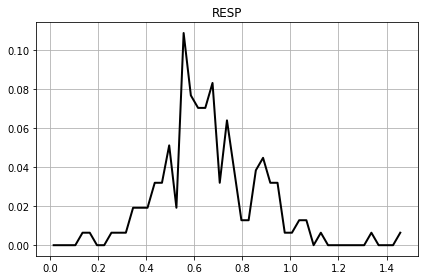

In [30]:
%matplotlib inline
#locmax_ecg = peak_detection(x_ecg_filt, dt_ecg, w=3, d_min=50)
#locmax_resp = peak_detection(x_resp_filt, dt_resp, w=3, d_min=50)
locmax_resp = locmax(x_resp_filt)
w = 3 # window size for signal mass integration
#print(f"\n[+] peak detection: w = {w:d}")
pm = np.array([np.mean(x_resp_filt[i-w:i+w]) for i in locmax_resp])

# signal mass distribution
x0, p0 = p_hat(pm, n_bins=50, method='histogram')
plt.figure(figsize=(6,4))
plt.plot(x0, p0, '-k', lw=2)
plt.title(f"peak signal mass distribution, w = {w:d}")
plt.grid(True)
plt.title("RESP")
plt.tight_layout()
plt.show()

In [31]:
#thr_resp = float(input("threshold: "))
#print("thr_resp: ", thr_resp)

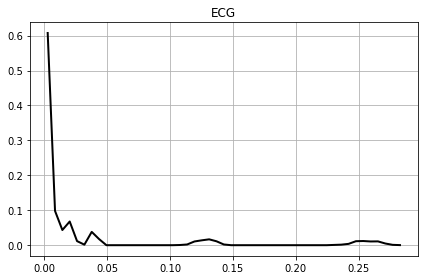

In [32]:
%matplotlib inline
locmax_ecg = locmax(x_ecg_filt)
# peak signal mass around local maxima
w = 3 # window size for signal mass integration
#print(f"\n[+] peak detection: w = {w:d}")
pm = np.array([np.mean(x_ecg_filt[i-w:i+w]) for i in locmax_ecg])

# signal mass distribution
x0, p0 = p_hat(pm, n_bins=50, method='histogram')
plt.figure(figsize=(6,4))
plt.plot(x0, p0, '-k', lw=2)
plt.title(f"peak signal mass distribution, w = {w:d}")
plt.grid(True)
plt.title("ECG")
plt.tight_layout()
plt.show()

In [33]:
# manual (peak signal mass) threshold selection
#thr_str = input("\t> threshold: ")
#thr = np.float(thr_str) # string => float
#thr = 4
# first set of candidate ECG indices
#px = np.array([j for i, j in enumerate(px0) if pm[i] > thr])

# remove peaks too close together
#d_min = 50 # min. distance between R-peaks
#px_c = px.copy()
#for i in range(len(px)-1):
#   if (px[i+1]-px[i] < d_min):
#        px_c[i+1] = 0
#px = px_c
#px = px[px>0]
#del px_c

# visual check of ECG detection
#plt.figure(figsize=(18,3))
#ax = plt.gca()
#ax.plot(t, x, ':k', lw=1)
#ax.plot(t[px0], x[px0], 'or', ms=3)
#ax.plot(t[px], x[px], 'ob', ms=10, alpha=0.5)
#plt.title("Detected peaks")
#plt.tight_layout()
#plt.show()

In [36]:
# this tells the notebook to open figures outside of the notebook
%matplotlib qt
fig2, ax = plt.subplots(2, 1, figsize=(16,4), sharex=True)

ax[0].plot(time_ecg, x_ecg, '-k', lw=0.5)
ax[0].plot(time_ecg, x_ecg_filt, '-b', lw=1.0)
ax[0].plot(time_ecg[locmax_ecg], x_ecg_filt[locmax_ecg], 'or', ms=5)
ax[0].set_xlabel("time [sec]")
ax[0].set_title("ECG")

ax[1].plot(time_resp, x_resp, '-k', lw=0.5)
ax[1].plot(time_resp, x_resp_filt, '-b', lw=1.0)
ax[1].plot(time_resp[locmax_resp], x_resp_filt[locmax_resp], 'or', ms=5)
ax[1].set_xlabel("time [sec]")
ax[1].set_title("RESP")

plt.tight_layout()
plt.show()

peak-to-peak statistics

In [35]:
resp_intervals = np.diff(locmax_resp)*dt_resp
mn = resp_intervals.min()
mx = resp_intervals.max()
mu = resp_intervals.mean()
mu_freq = 1/mu
sd = resp_intervals.std()
q25 = np.percentile(resp_intervals, 25)
q75 = np.percentile(resp_intervals, 75)
print("Respiratory cycle stats:")
print(f"min: {mn:.2f} sec")
print(f"max: {mx:.2f} sec")
print(f"mean: {mu:.2f} sec (= {mu_freq:.2f} Hz)")
print(f"std: {sd:.2f} sec")
print(f"q25: {q25:.2f} sec")
print(f"q75: {q75:.2f} sec")

Respiratory cycle stats:
min: 0.52 sec
max: 1.28 sec
mean: 0.77 sec (= 1.30 Hz)
std: 0.13 sec
q25: 0.66 sec
q75: 0.82 sec
